In [1]:

import tensorflow as tf
from tensorflow.keras.datasets import mnist

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

# Encoder
input_img = Input(shape=(28, 28, 1))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)


autoencoder = Model(input_img, decoded)
autoencoder.summary()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 14, 14, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 28, 28, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 1)           │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,217 (12.57 KB)

 Trainable params: 3,217 (12.57 KB)

 Non-trainable params: 0 (0.00 B)

In [2]:

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=100,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 78s 125ms/step - loss: 0.2442 - val_loss: 0.0920
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 75s 114ms/step - loss: 0.0897 - val_loss: 0.0825
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 82s 114ms/step - loss: 0.0824 - val_loss: 0.0789
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 82s 114ms/step - loss: 0.0791 - val_loss: 0.0767
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 67s 111ms/step - loss: 0.0771 - val_loss: 0.0754
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 87s 119ms/step - loss: 0.0760 - val_loss: 0.0745
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 79s 115ms/step - loss: 0.0752 - val_loss: 0.0740
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 82s 115ms/step - loss: 0.0747 - val_loss: 0.0735
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 82s 115ms/step - loss: 0.0740 - val_loss: 0.0731
Epoch 10/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 82s 115ms/step - loss: 0.0738 - val_loss: 0.0728


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


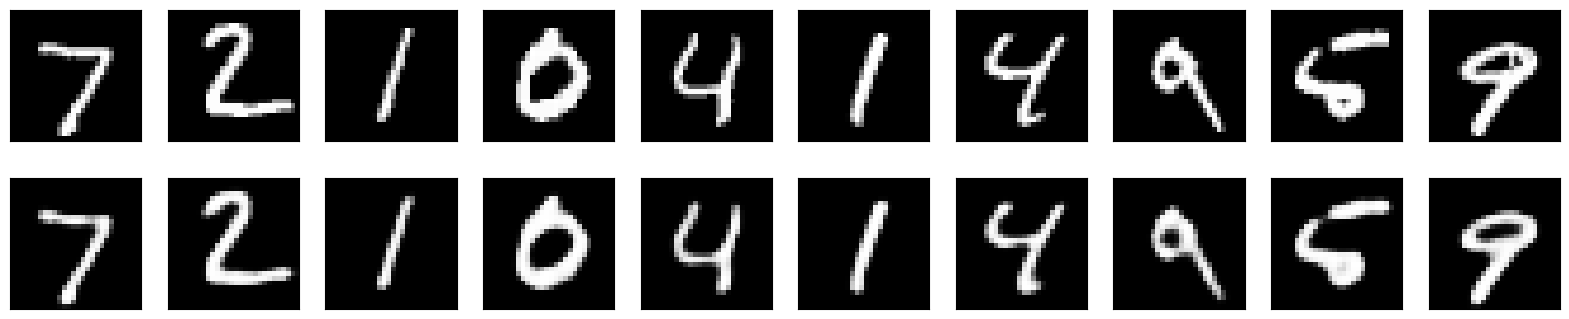

Mean Squared Error: 0.0040296646766364574


In [3]:
decoded_imgs = autoencoder.predict(x_test)

import matplotlib.pyplot as plt

n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

from sklearn.metrics import mean_squared_error

# Calculate MSE for the test set
mse = mean_squared_error(x_test.flatten(), decoded_imgs.flatten())
print(f'Mean Squared Error: {mse}')